In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


In [2]:
from statsmodels.tsa.ar_model import AR

In [3]:
train = pd.read_csv('train.csv', parse_dates=[1])
test = pd.read_csv('test.csv', parse_dates=[1])
df = train.copy()
df_test = test.copy()

In [70]:
df.head(), df_test.head()

(   ID            Datetime  Count  lag1  resid
 0   0 2012-08-25 00:00:00      8   NaN    NaN
 1   1 2012-08-25 01:00:00      2   8.0   -6.0
 2   2 2012-08-25 02:00:00      6   2.0    4.0
 3   3 2012-08-25 03:00:00      2   6.0   -4.0
 4   4 2012-08-25 04:00:00      2   2.0    0.0,
       ID            Datetime
 0  18288 2014-09-26 00:00:00
 1  18289 2014-09-26 01:00:00
 2  18290 2014-09-26 02:00:00
 3  18291 2014-09-26 03:00:00
 4  18292 2014-09-26 04:00:00)

In [71]:
df.index = df.Datetime

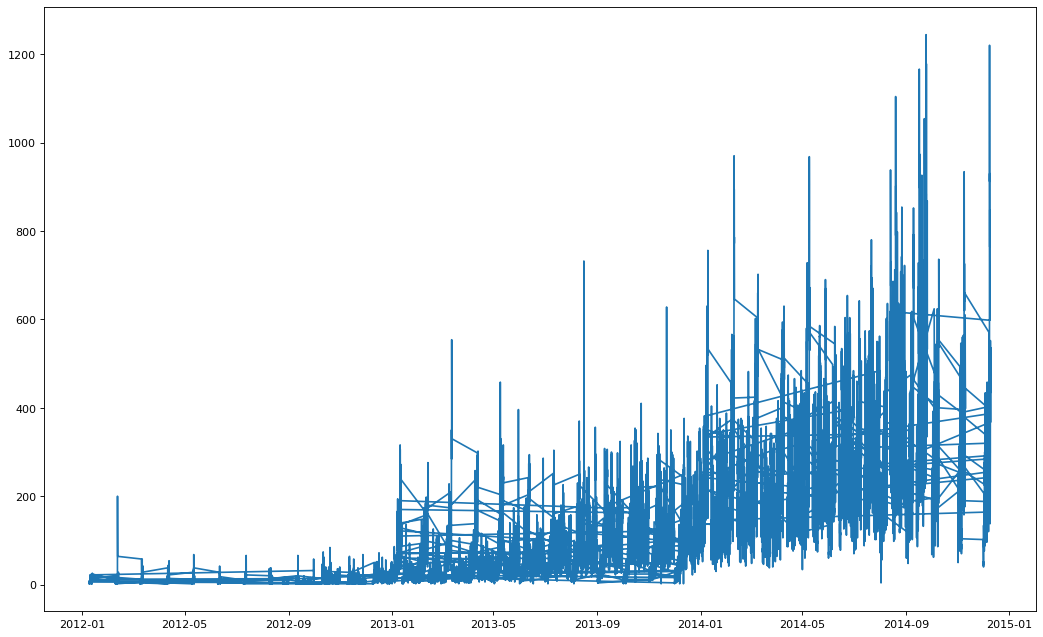

In [82]:
figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Count)

In [83]:
df['lag1'] = df.Count.shift(1)
df['resid'] = df.Count - df.lag1

In [84]:
df.head()

,ID,Datetime,Count,lag1,resid
Datetime,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,NaN,NaN
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,8.0,-6.0
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2.0,4.0
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,6.0,-4.0
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2.0,0.0


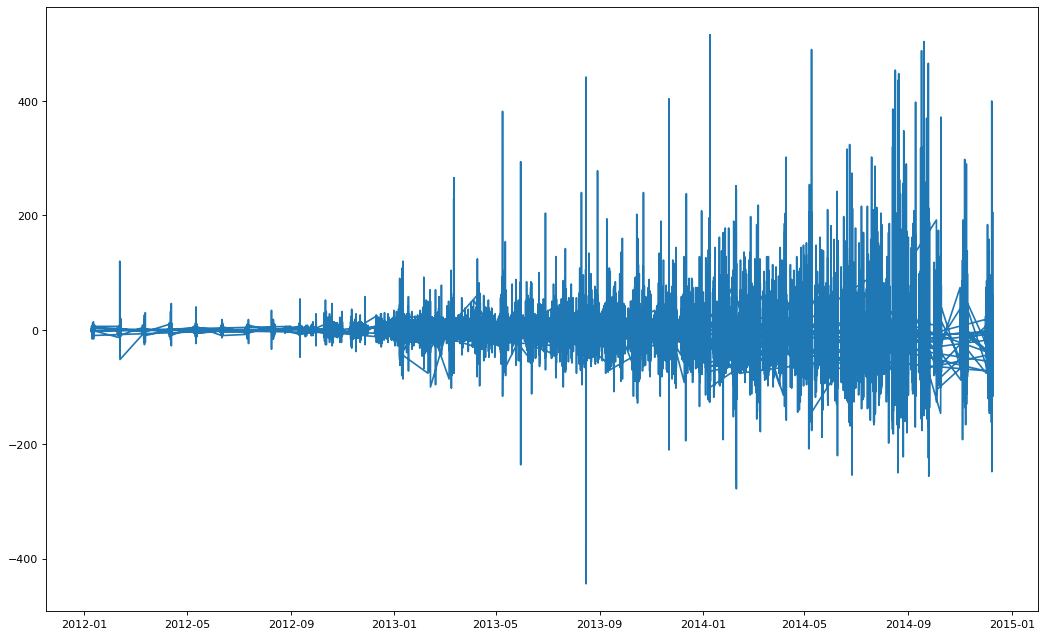

In [85]:
figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.resid)

In [93]:
df['day'] = df['Datetime'].dt.day
df['month'] = df['Datetime'].dt.month
df['year'] = df['Datetime'].dt.year
df['hour'] = df['Datetime'].dt.hour

In [94]:
df.head()

,ID,Datetime,Count,lag1,resid,day,month,year,hour
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,NaN,NaN,25,8,2012,0
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,8.0,-6.0,25,8,2012,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2.0,4.0,25,8,2012,2
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,6.0,-4.0,25,8,2012,3
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2.0,0.0,25,8,2012,4


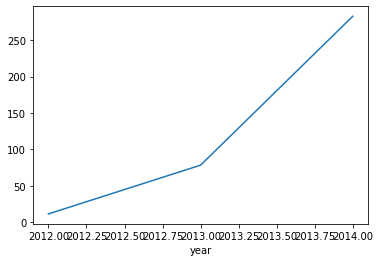

In [97]:
df.groupby('year')['Count'].mean().plot()

In [98]:
#trend is obvious 

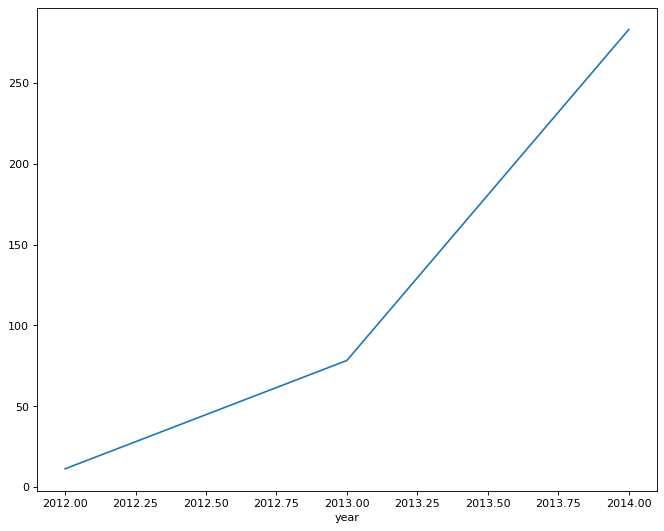

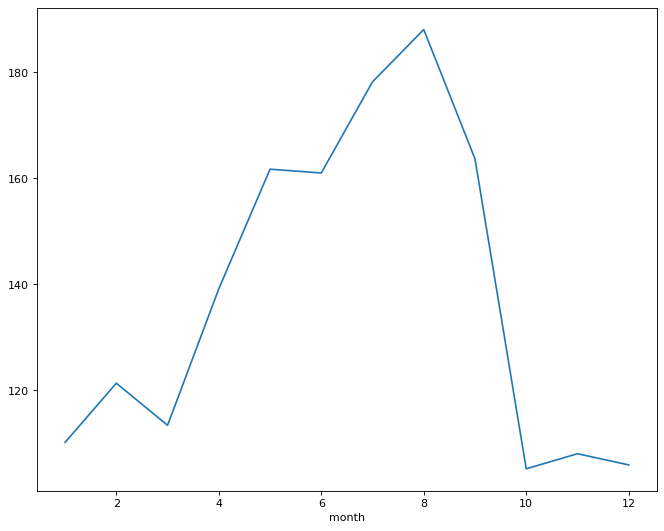

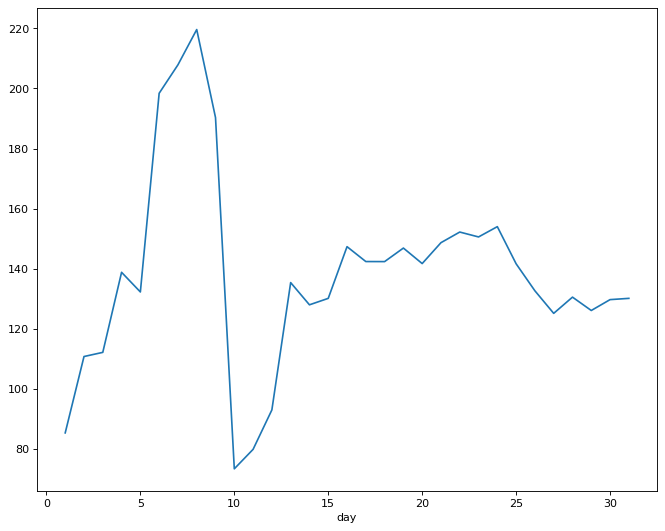

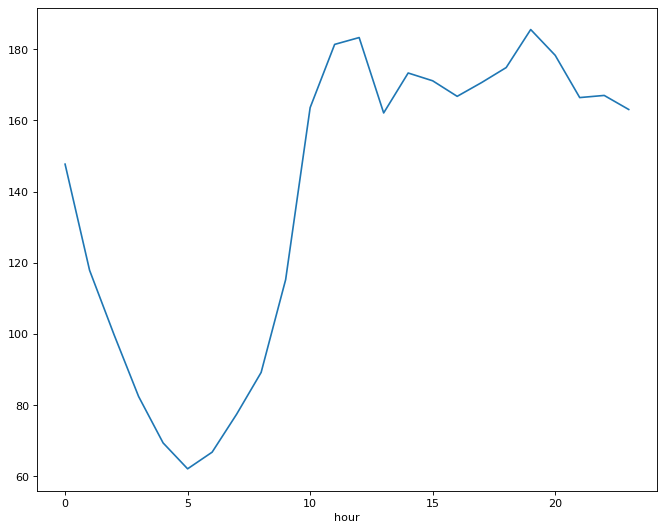

In [107]:
for subject in ['year','month','day','hour']:
    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    plot = df.groupby(subject)['Count'].mean().plot()
    plt.show()

In [109]:
#trend in yearly pattern  and seasonality in monthly pattern are obvious